In [154]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [155]:
df = pd.read_csv('sample.csv')
df_simple = df.loc[:, ["categories", "stars_business", "name"]]

In [156]:
def get_categories(df):
    unique_categories = df["categories"].dropna().unique()
    cat_set = set()
    for categories in unique_categories:
        cat_lst = categories.split(",")
        for c in set(cat_lst):
            cat_set.add(c.strip())
    return list(cat_set)

In [157]:
def get_num_reviews_per_category(df, categories):
    df = df[df['categories'].notna()]
    num_reviews_per_cat = np.zeros(len(categories))
    for index, row in df.iterrows():
        cat_lst = row["categories"].split(",")
        for c in set(cat_lst):
            index = categories.index(c.strip())
            num_reviews_per_cat[index] += 1
    return num_reviews_per_cat

In [158]:
def get_avg_star_per_category(df, categories):
    avg_stars_per_cat = np.zeros(len(categories))
    business_per_cat = np.zeros(len(categories))
    seen_restaurants = set()
    df = df[df['categories'].notna()]
    for index, row in df.iterrows():
        cat_lst = row["categories"].split(",")
        for c in set(cat_lst):
            index = categories.index(c.strip())
            if row["name"] not in seen_restaurants or business_per_cat[index] == 0:
                business_per_cat[index] += 1
                avg_stars_per_cat[index] += row["stars_business"]
        if row["name"] not in seen_restaurants:
            seen_restaurants.add(row["name"])
                
    avg_stars_per_cat = avg_stars_per_cat/business_per_cat
    return avg_stars_per_cat


In [159]:
def get_plot_data():
    categories_lst = get_categories(df_simple)
    num_reviews_per_cat = get_num_reviews_per_category(df_simple, categories_lst)
    avg_business_stars_per_cat = get_avg_star_per_category(df_simple, categories_lst)
    data_lst = []
    
    for i in range(0, len(categories_lst)):
        category = categories_lst[i]
        num_reviews = num_reviews_per_cat[i]
        avg_stars = avg_business_stars_per_cat[i]
        data = (num_reviews, category, avg_stars,)
        data_lst.append((num_reviews, category, avg_stars))
    
    data_lst.sort(key=lambda x:(-x[0],x[1]))
    return data_lst
    

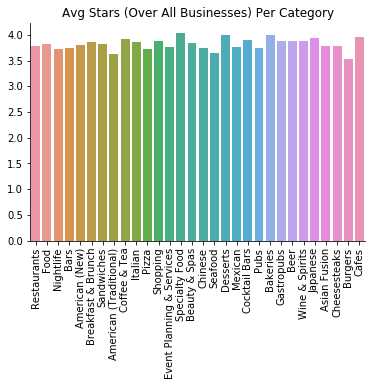

In [160]:
# sorted by num reviews
count = 30
lst = get_plot_data()
x = [x[1] for x in lst[:count]]
y = [y[2] for y in lst[:count]]
sns.barplot(x=x, y=y)
plt.xticks(rotation=90)
plt.title("Avg Stars (Over All Businesses) Per Category")
sns.despine()
plt.show()